In [39]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
df = pd.read_csv("./datasets/fixed_battery_log.csv")
df = df.drop(df.columns[0], axis=1)
df["date"] = pd.to_datetime(df["date"])

In [41]:
users = df["User"].unique()
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

In [42]:
def right_user_template(user, df):
    print(user)
    user_df = df.loc[
        (df["User"] == user)
        & (df["date"] > dt.datetime(2022, 1, 1))
        & (df["date"] < dt.datetime(2022, 1, 31))
    ]
    count_list = np.empty((len(user_df["date"].dt.date.unique()), 24))

    for q in range(len(user_df["date"].dt.date.unique())):
        a_day_data = user_df.loc[
            user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]
        ]
        a_day_data.set_index("date", inplace=True)
        for i in range(0, 24):
            if i == 23:
                s_time = "23:00:00"
                e_time = "23:59:59"
                #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
            else:
                s_time = "{}:00:00".format(i)
                e_time = "{}:00:00".format(i + 1)
                #             print("i :",i," value ",len(a_day_data_2.between_time(s_time,e_time)))
                count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
    #     print("after ",count_list[q])
    template = count_list.copy()
    np.place(template, template == 0, np.nan)
    template = np.nanmean(template, axis=0)
    template = np.nan_to_num(template)
    return template

In [43]:
nari_data = right_user_template("Narita", df)

Narita


<ipython-input-42-df5dfbcf2c68>:23: RuntimeWarning: Mean of empty slice
  template = np.nanmean(template,axis=0)


In [44]:
nari_data

array([1.        , 2.        , 0.        , 0.        , 0.        ,
       1.        , 1.33333333, 1.        , 1.42857143, 1.14285714,
       1.16666667, 1.125     , 2.        , 1.5       , 1.3       ,
       1.11111111, 1.9       , 1.1       , 1.09090909, 1.33333333,
       1.        , 1.        , 1.14285714, 1.6       ])

In [45]:
def diff_right_user(user, df, template):
    right_user_diff_data = np.zeros((0, 0))
    for g in range(1, 31):
        user_df = df.loc[
            (df["User"] == user)
            & (df["date"] > dt.datetime(2021, 12, g))
            & (df["date"] < dt.datetime(2022, 12, g + 1))
        ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()), 24))

        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[
                user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]
            ]
            a_day_data.set_index("date", inplace=True)
            for i in range(0, 24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i + 1)
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
        data_24h = count_list.copy()
        np.place(data_24h, data_24h == 0, np.nan)
        data_24h = np.nanmean(data_24h, axis=0)
        data_24h = np.nan_to_num(data_24h)
        right_user_diff_data = np.append(
            right_user_diff_data, np.linalg.norm(template - data_24h, 2)
        )
    return right_user_diff_data

In [46]:
frr_data = diff_right_user("Narita", df, nari_data)

<ipython-input-45-6bf78ebf73b4>:21: RuntimeWarning: Mean of empty slice
  data_24h = np.nanmean(data_24h,axis=0)


In [47]:
frr_data

array([2.49725307, 2.49725307, 2.49725307, 2.49725307, 3.35042873,
       3.35042873, 3.35042873, 3.35198363, 3.35198363, 3.35102001,
       3.35617704, 3.35405729, 3.35135968, 3.35156162, 3.35819436,
       3.35295847, 3.35241524, 3.35368891, 3.35460026, 3.32599692,
       3.32272155, 3.32232221, 3.31635994, 3.31635994, 3.31364368,
       3.31132875, 3.30966869, 3.30867802, 3.31428667, 3.31428667])

In [48]:
def pick_up_data_from_other_user_templates(right_user, users, df):
    templates = []
    others = users.copy()
    others = others[~(others == right_user)]
    print(others)
    for other in others:
        print(other)
        user_df = df.loc[
            (df["User"] == other)
            & (df["date"] > dt.datetime(2022, 1, 1))
            & (df["date"] < dt.datetime(2022, 1, 31))
        ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()), 24))

        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[
                user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]
            ]
            a_day_data.set_index("date", inplace=True)
            for i in range(0, 24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i + 1)
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
        template = count_list.copy()
        np.place(template, template == 0, np.nan)
        template = np.nanmean(template, axis=0)
        template = np.nan_to_num(template)
        templates.append(template)
    return np.random.choice(np.array(templates).ravel(), 24)

In [58]:
def diff_others_data(right_user, users, df, right_user_template):
    other_users_diff_data = np.zeros((0, 0))
    others = users.copy()
    others = others[~(others == right_user)]

    for j in range(0, 30):

        other = np.random.choice(others)
        day = np.random.randint(1, 31)
        print(other, "の12月", day, "日")

        user_df = df.loc[
            (df["User"] == other)
            & (df["date"] > dt.datetime(2021, 12, day))
            & (df["date"] < dt.datetime(2022, 12, day + 1))
        ]
        count_list = np.empty((len(user_df["date"].dt.date.unique()), 24))
        for q in range(len(user_df["date"].dt.date.unique())):
            a_day_data = user_df.loc[
                user_df["date"].dt.date == user_df["date"].dt.date.unique()[q]
            ]
            a_day_data.set_index("date", inplace=True)
            for i in range(0, 24):
                if i == 23:
                    s_time = "23:00:00"
                    e_time = "23:59:59"
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
                else:
                    s_time = "{}:00:00".format(i)
                    e_time = "{}:00:00".format(i + 1)
                    count_list[q][i] = len(a_day_data.between_time(s_time, e_time))
        data_24h = count_list.copy()
        np.place(data_24h, data_24h == 0, np.nan)
        data_24h = np.nanmean(data_24h, axis=0)
        data_24h = np.nan_to_num(data_24h)
        other_users_diff_data = np.append(
            other_users_diff_data, np.linalg.norm(right_user_template - data_24h, 2)
        )
    return other_users_diff_data

In [59]:
far_data = diff_others_data("Narita", users, df, nari_data)

Daiki の12月 25 日
Isshin の12月 15 日
Isshin の12月 5 日
Moriyama の12月 21 日


<ipython-input-58-8161bd1ecad1>:28: RuntimeWarning: Mean of empty slice
  data_24h = np.nanmean(data_24h,axis=0)


Ayumi の12月 3 日
Shunya の12月 21 日
Isshin の12月 3 日
Daiki の12月 21 日
Moriyama の12月 28 日
Isshin の12月 5 日
Hayate の12月 29 日
Yusuke の12月 24 日
Moriyama の12月 8 日
Daiki の12月 12 日
Yusuke の12月 27 日
Isshin の12月 24 日
Moriyama の12月 24 日
Yusuke の12月 7 日
Hayate の12月 7 日
Shunya の12月 21 日
Hayate の12月 10 日
Moriyama の12月 27 日
Isshin の12月 26 日
Yusuke の12月 22 日
Hayate の12月 26 日
Yusuke の12月 27 日
Yusuke の12月 23 日
Ayumi の12月 11 日
Moriyama の12月 7 日
Moriyama の12月 25 日


In [60]:
far_data

array([3.96297138, 2.65672752, 2.67868161, 2.56985164, 2.91267148,
       2.71332942, 2.64925029, 3.89157224, 2.73903541, 2.67868161,
       3.13176628, 2.47859093, 2.50350061, 3.68185135, 2.51243279,
       2.56226132, 2.56810433, 2.27024311, 3.12704859, 2.71332942,
       3.13064338, 2.69394563, 2.55624753, 2.46986131, 3.10392476,
       2.51243279, 2.4806215 , 2.92241014, 2.50486653, 2.6709669 ])

In [52]:
frr_data

array([2.49725307, 2.49725307, 2.49725307, 2.49725307, 3.35042873,
       3.35042873, 3.35042873, 3.35198363, 3.35198363, 3.35102001,
       3.35617704, 3.35405729, 3.35135968, 3.35156162, 3.35819436,
       3.35295847, 3.35241524, 3.35368891, 3.35460026, 3.32599692,
       3.32272155, 3.32232221, 3.31635994, 3.31635994, 3.31364368,
       3.31132875, 3.30966869, 3.30867802, 3.31428667, 3.31428667])

In [80]:
x = np.arange(0.0, 4.0, 0.001)
frr = np.zeros((0, 0))
far = np.zeros((0, 0))
for i in x:
    frr = np.append(frr, 1 - (np.sum(frr_data <= i) / 30))
    far = np.append(far, np.sum(far_data <= i) / 30)
    print(
        "閾値: ",
        i,
        "frr: ",
        1 - (np.sum(frr_data <= i) / 30),
        "far: ",
        np.sum(far_data <= i) / 30,
    )

閾値:  0.0 frr:  1.0 far:  0.0
閾値:  0.001 frr:  1.0 far:  0.0
閾値:  0.002 frr:  1.0 far:  0.0
閾値:  0.003 frr:  1.0 far:  0.0
閾値:  0.004 frr:  1.0 far:  0.0
閾値:  0.005 frr:  1.0 far:  0.0
閾値:  0.006 frr:  1.0 far:  0.0
閾値:  0.007 frr:  1.0 far:  0.0
閾値:  0.008 frr:  1.0 far:  0.0
閾値:  0.009000000000000001 frr:  1.0 far:  0.0
閾値:  0.01 frr:  1.0 far:  0.0
閾値:  0.011 frr:  1.0 far:  0.0
閾値:  0.012 frr:  1.0 far:  0.0
閾値:  0.013000000000000001 frr:  1.0 far:  0.0
閾値:  0.014 frr:  1.0 far:  0.0
閾値:  0.015 frr:  1.0 far:  0.0
閾値:  0.016 frr:  1.0 far:  0.0
閾値:  0.017 frr:  1.0 far:  0.0
閾値:  0.018000000000000002 frr:  1.0 far:  0.0
閾値:  0.019 frr:  1.0 far:  0.0
閾値:  0.02 frr:  1.0 far:  0.0
閾値:  0.021 frr:  1.0 far:  0.0
閾値:  0.022 frr:  1.0 far:  0.0
閾値:  0.023 frr:  1.0 far:  0.0
閾値:  0.024 frr:  1.0 far:  0.0
閾値:  0.025 frr:  1.0 far:  0.0
閾値:  0.026000000000000002 frr:  1.0 far:  0.0
閾値:  0.027 frr:  1.0 far:  0.0
閾値:  0.028 frr:  1.0 far:  0.0
閾値:  0.029 frr:  1.0 far:  0.0
閾値:  0.03 frr:

In [104]:
print("閾値:", x[np.where((frr - far) == 0)], "の時交差")
print("FRR:", 1 - np.sum(frr_data <= x[np.where((frr - far) == 0)]) / 30)
print("FAR:", np.sum(far_data <= x[np.where((frr - far) == 0)]) / 30)
print("EER:", np.sum(far_data <= x[np.where((frr - far) == 0)]) / 30)

閾値: [3.131] の時交差
FRR: 0.8666666666666667
FAR: 0.8666666666666667
EER: 0.8666666666666667


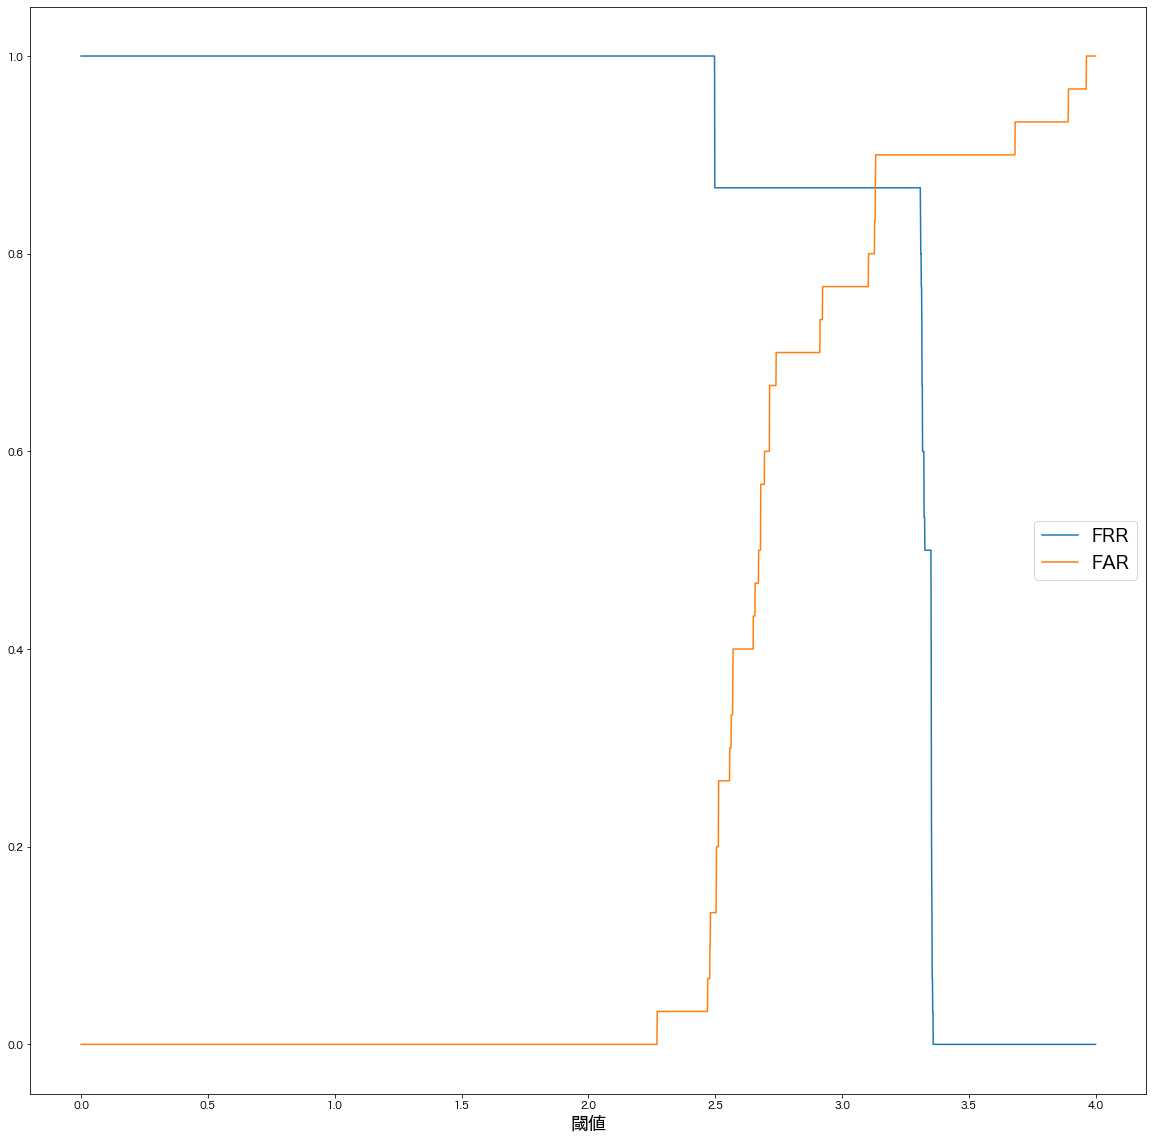

In [124]:
plt.figure(figsize=[20, 20])
plt.plot(x, frr, label="FRR")
plt.plot(x, far, label="FAR")
plt.rcParams["font.family"] = "Hiragino Sans"
plt.xlabel("閾値", fontsize=18)
plt.legend(fontsize=18)
plt.savefig("result.jpg")
plt.show()

学習データ、認証データのイベント料が弱い月を選ぶ(12,1月)

13日: 充電要領 15日以降: 考慮のブレスト